# Example of Green Screen Compositing Effect

Green screen compositing is an image processing effect in which an image containing a foreground object situated against a monochromatic, typically green, background, is transformed, with the green background being replaced by a different background image.

This notebook demosntrates a simple green screen image compositing technique using Python.

*The example is based on an original example from Bryn Mawr College that can be found [here](https://athena.brynmawr.edu/jupyter/hub/dblank/public/CS110%20Intro%20to%20Computing/2015-Fall/Lectures/Photoshop-like%20Functions.ipynb).*

In [26]:
#We'll use the PIL image handling package
from PIL import Image

In [27]:
#Location of original image files
url='http://blog.unem.de/wp-content/uploads/2012/05/11-Greenscreen-Clarissa-Knorr.jpg'
url2='http://images.tenplay.com.au/~/media/News/National%20News/National%20News%20do%20not%20delete/News_National_showheader_480x210.jpg'

In [28]:
#Local copy
#!wget {url1}
#!wget {url2}

The first thing we need to do is grab copies of our two images, the greenscreen foregrounf image (`fg`) and the background image (`bg`).

In [29]:
#Load in the image files
import requests
from io import BytesIO

response = requests.get(url)
fg = Image.open(BytesIO(response.content))

response = requests.get(url2)
bg = Image.open(BytesIO(response.content))

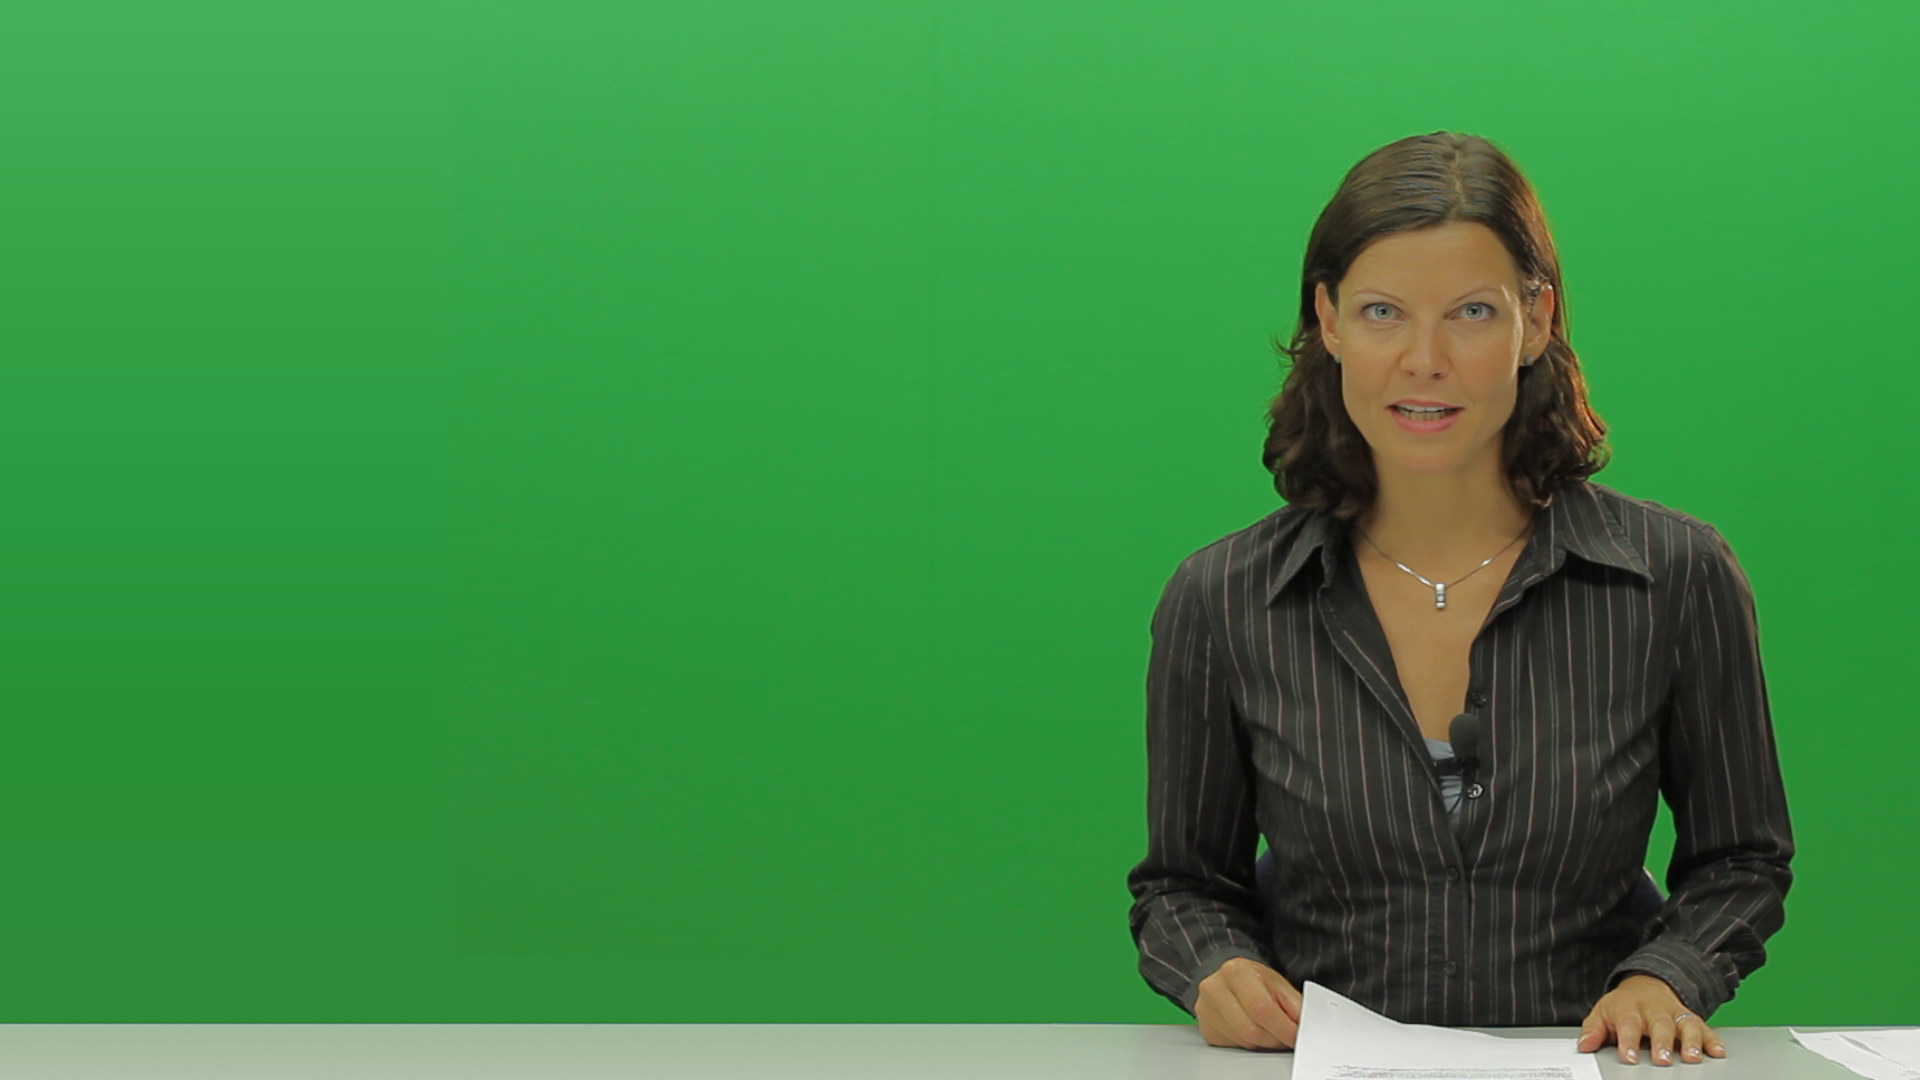

In [30]:
fg

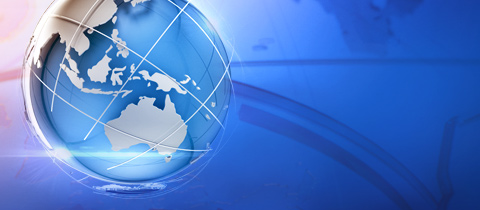

In [31]:
bg

We can check the size of the images and then resize them to something more convenient.

In [32]:
#Find the size of the larger foreground image
fg.size

(1920, 1080)

In [33]:
#Let's resize the foreground image to make it smaller...
fg=fg.resize((int(fg.width/4.0), int(fg.height/4.0)))

#And then make the background image the same size
bg=bg.resize((fg.width, fg.height))

Let's create a new, empty image, making it the same size as the foreground image so it can act as a basis for our composite image.

In [34]:
#Create a base composite image
composite = Image.new('RGB',(fg.width, fg.height))

We need to create references to the pixel elements of each image.

In [35]:
#Create references to the pixels in each image
fgpix=fg.load()
bgpix=bg.load()
cpix=composite.load()

In [36]:
#Pixels are accessed via two co-ordinates and return a 3-tuple of RGB values
fgpix[0,0]

(70, 175, 90)

In [37]:
print('Red: {r}, green: {g}, blue: {b}'.format(r=fgpix[0,0][0],
                                               g=fgpix[0,0][1],
                                               b=fgpix[0,0][2]))

Red: 70, green: 175, blue: 90


Now we can create our composite image. 

Crudely, we might say that the presenter is on the right hand side of the image and background on the left - so let's just use the left half of the background image and the right half of the foreground image in our composite image.

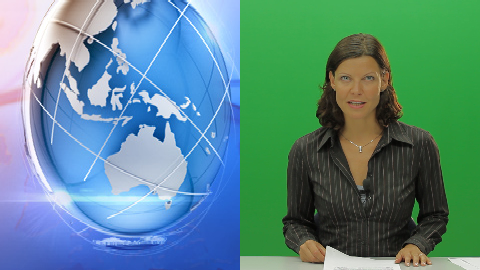

In [38]:
#To scan through the pixels, imagine the image as being made up of a table, or grid, of pixels

#Scan along each row of pixels in the foreground image
#The range(max) function with one argument iterates through integer values 0..max-1
for x in range(fg.width):
    #and for each row, look down the pixels in each column
    for y in range(fg.height):
        if x < (fg.width/2):
            cpix[x,y]=(bgpix[x,y][0],bgpix[x,y][1],bgpix[x,y][2])
        else:
            cpix[x,y]=(fgpix[x,y][0],fgpix[x,y][1],fgpix[x,y][2])

composite

We could even do a slider effect...

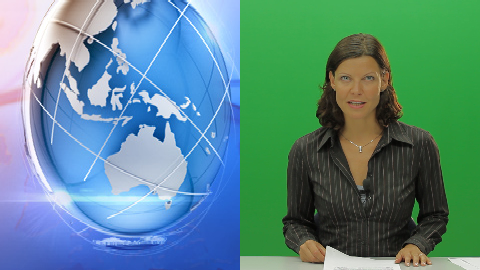

<function __main__.sliderscreen>

In [39]:
from ipywidgets import interact

def sliderscreen(width):
    for x in range(fg.width):
        for y in range(fg.height):
            if x < (width):
                cpix[x,y]=(bgpix[x,y][0],bgpix[x,y][1],bgpix[x,y][2])
            else:
                cpix[x,y]=(fgpix[x,y][0],fgpix[x,y][1],fgpix[x,y][2])

    return composite

interact(sliderscreen,width=(0,fg.width))

Of course, what we really want to do is replace all the green pixels, particularly the ones that surround the presenter.

If we look at each pixel value in the greenscreen (foreground) image, we can check to see if it is green:

- if it is, use the pixel from the background image
- if it isn't, use the pixel from the greenscreen foreground image

Let's make a start by just guessing that a pixel is green if the G component of the RGB colour value, which has a range of 0..255, is greater than 150, and the value of the R and B values are less than 100.

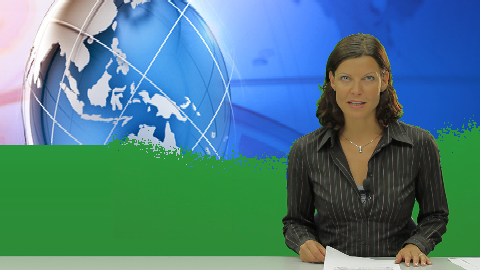

In [40]:
for x in range(fg.width):
    for y in range(fg.height):
        if fgpix[x,y][0] < 100 and fgpix[x,y][1] > 150 and fgpix[x,y][2] < 100 :
            cpix[x,y]=(bgpix[x,y][0],bgpix[x,y][1],bgpix[x,y][2])
        else:
            cpix[x,y]=(fgpix[x,y][0],fgpix[x,y][1],fgpix[x,y][2])

composite

Write a function that accepts the R, G and B cut off values and returns the composite image. Use the function to quickly experiment with different cutoff values to see if you can find a set of values that completely removes the green background but retains the foreground character. 

In [41]:
#YOUR FUNCTION


Now write slightly more complex function that makes the pixel selection decision based on the maximum and minimum values for each of the RGB component values for each pixel.

In [42]:
#YOUR MORE COMPLEX FUNCTION


Now see if you can instrument the more complex function with widget sliders that allow you to set the maximum and minimum values of hte RGB components. (Ignore the requirement for the maximum being greater than the minumum value.) Can you split any of the logic out into two or more functions to make a more elegant solution?

In [43]:
#A MORE ELEGANT SOLUTION

### My Widget Solution

For my solution, I created a function that returned a Boolean `True` or `False` value based on a comparison of the RGB values of a particular pixel with a set of RGB threshold values, and then called this from a function that scanned through each pixel in the foreground image to make the judgement about whether a pixel was green or not.

I also used the indices `i` and `j` to address the individual pixels in the images because I find they read better for me, as well as being used more conventionally as index variables.

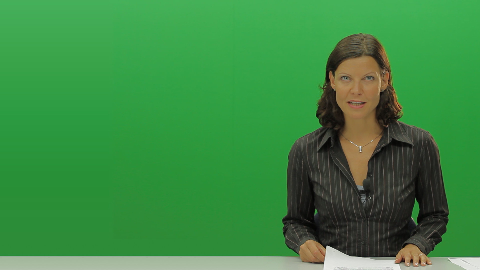

<function __main__.greenscreen>

In [44]:
def pixelcomparison(pix,rmin,rmax,gmin,gmax,bmin,bmax):
    if pix[0] > rmin and pix[0]<rmax and pix[1] > gmin and pix[1] < gmax and pix[2] > bmin and pix[2] < bmax:
        return True
    else:
        return False

def greenscreen(rmin=0,rmax=50,gmin=100,gmax=150,bmin=100,bmax=200):
    for i in range(fg.width):
        for j in range(fg.height):
            if pixelcomparison(fgpix[i,j],rmin,rmax,gmin,gmax,bmin,bmax):
                cpix[i,j]=(bgpix[i,j][0],bgpix[i,j][1],bgpix[i,j][2])
            else:
                cpix[i,j]=(fgpix[i,j][0],fgpix[i,j][1],fgpix[i,j][2])
    return composite

interact(greenscreen,rmin=(0,255),rmax=(0,255),gmin=(0,255),gmax=(0,255),bmin=(0,255),bmax=(0,255))

By looking at a single colour channel, we can get a feel for what each separate filter setting allows through.}

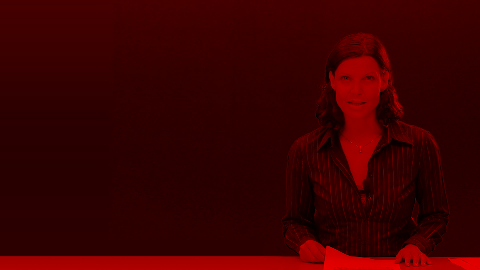

<function __main__.colorscreen>

In [45]:
def colorscreen(pmin=0,pmax=255,color='r',polarity='plus'):
    tmpimg=Image.new('RGB',(fg.width, fg.height))
    tmppix=tmpimg.load()
    cmap={'r':0,'g':0,'b':0}
    for i in range(fg.width):
        for j in range(fg.height):
            if fgpix[i,j][cmap[color]] > pmin and fgpix[i,j][cmap[color]]<pmax:
                if color=='r':
                    tmppix[i,j]=(fgpix[i,j][0],0,0) if polarity=='plus' else (0,fgpix[i,j][1],fgpix[i,j][2])
                elif color=='g':
                    tmppix[i,j]=(0,fgpix[i,j][2],0) if polarity=='plus' else (fgpix[i,j][0],0,fgpix[i,j][2])
                else:
                    tmppix[i,j]=(0,0,fgpix[i,j][2]) if polarity=='plus' else(fgpix[i,j][0],fgpix[i,j][1],0)
    return tmpimg

interact(colorscreen,pmin=(0,255),pmax=(0,255), color=('r','g','b'),polarity=('plus','minus'))